In [3]:
data <- read.csv('CTG.csv' , header = TRUE )
head(data)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
6,134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3


In [4]:
str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [6]:
data$NSP <- factor(data$NSP)

In [8]:
table(data$NSP)


   1    2    3 
1655  295  176 

In [10]:
set.seed(123)

ind = sample(2 , nrow(data) , prob = c(0.7,0.3) , replace = TRUE)

In [11]:
tdata <- data[ind == 1 , ]
vdata <- data[ind == 2 , ]

In [16]:
print(dim(tdata))
print(dim(vdata))

[1] 1495   22
[1] 631  22


In [17]:
library(randomForest)
set.seed(222)

rf <- randomForest(NSP~. , data = tdata)

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [19]:
print(rf)


Call:
 randomForest(formula = NSP ~ ., data = tdata) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 5.62%
Confusion matrix:
     1   2   3 class.error
1 1142  17   1  0.01551724
2   47 164   2  0.23004695
3    6  11 105  0.13934426


In [21]:
attributes(rf)

$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

In [22]:
#Prediction and Confusion Matrix
library(caret)
p1 <- predict(rf , tdata)
confusionMatrix(p1 , tdata$NSP)

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1 1160    2    0
         2    0  211    0
         3    0    0  122

Overall Statistics
                                          
               Accuracy : 0.9987          
                 95% CI : (0.9952, 0.9998)
    No Information Rate : 0.7759          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9964          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9906  1.00000
Specificity            0.9940   1.0000  1.00000
Pos Pred Value         0.9983   1.0000  1.00000
Neg Pred Value         1.0000   0.9984  1.00000
Prevalence             0.7759   0.1425  0.08161
Detection Rate         0.7759   0.1411  0.08161
Detection Prevalence   0.7773   0.1411  0.08161
Balanced Accuracy      0.9970

In [25]:
p2 <- predict(rf , vdata)
confusionMatrix(p2 , vdata$NSP )

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 482  17   4
         2  11  61   4
         3   2   4  46

Overall Statistics
                                          
               Accuracy : 0.9334          
                 95% CI : (0.9111, 0.9516)
    No Information Rate : 0.7845          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8109          
                                          
 Mcnemar's Test P-Value : 0.5823          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9737  0.74390  0.85185
Specificity            0.8456  0.97268  0.98960
Pos Pred Value         0.9583  0.80263  0.88462
Neg Pred Value         0.8984  0.96216  0.98618
Prevalence             0.7845  0.12995  0.08558
Detection Rate         0.7639  0.09667  0.07290
Detection Prevalence   0.7971  0.12044  0.08241
Balanced Accuracy      0.9097  0.85829  0

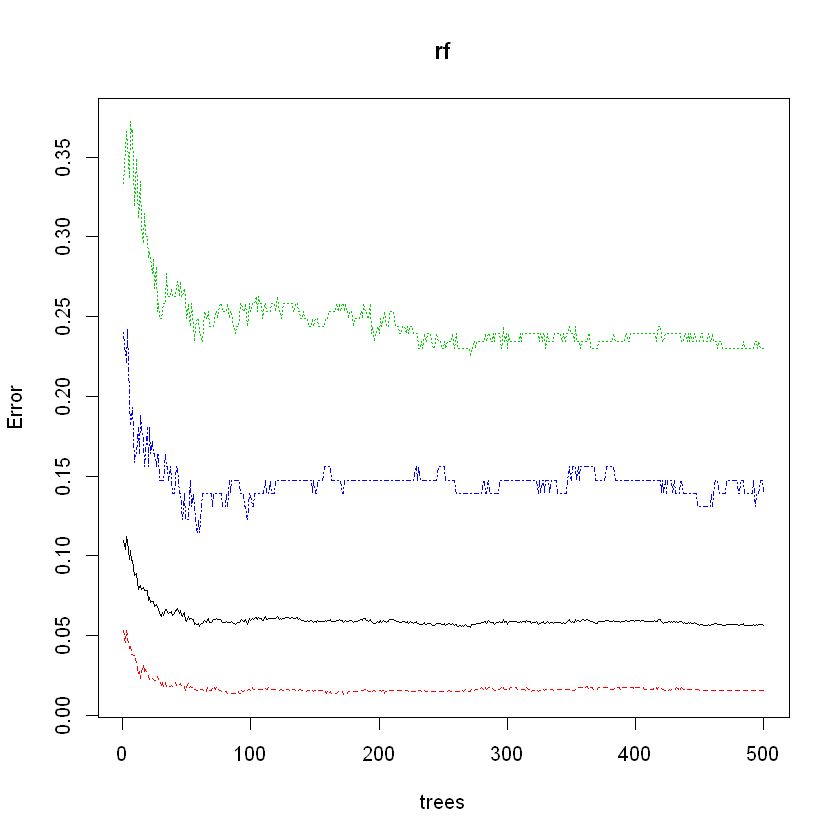

In [26]:
#Error rate of Random Forest

plot(rf)

mtry = 4  OOB error = 5.62% 
Searching left ...
mtry = 8 	OOB error = 5.28% 
0.05952381 0.05 
mtry = 16 	OOB error = 5.62% 
-0.06329114 0.05 
Searching right ...
mtry = 2 	OOB error = 6.69% 
-0.2658228 0.05 


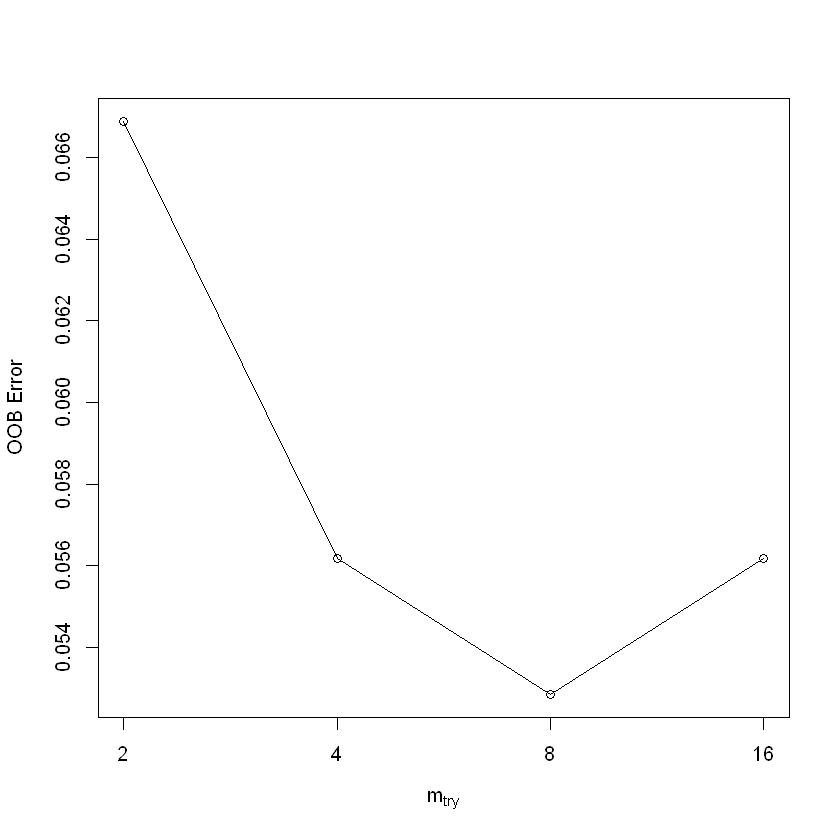

In [28]:
#Tuning Random Forest
t <- tuneRF(tdata[,-22] , tdata[,22] , stepFactor = 0.5,
            plot = TRUE , ntreeTry = 300 , 
           trace = TRUE , 
           improve = 0.05)

In [30]:
rf1 <- randomForest(NSP~. , data = tdata , ntree = 300, mtry = 8 , importance = TRUE , proximity = TRUE)

In [32]:
pred1 <- predict(rf1 , vdata)
confusionMatrix(pred1 , vdata$NSP)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 479  18   3
         2  14  60   2
         3   2   4  49

Overall Statistics
                                          
               Accuracy : 0.9319          
                 95% CI : (0.9093, 0.9502)
    No Information Rate : 0.7845          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8082          
                                          
 Mcnemar's Test P-Value : 0.7134          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9677  0.73171  0.90741
Specificity            0.8456  0.97086  0.98960
Pos Pred Value         0.9580  0.78947  0.89091
Neg Pred Value         0.8779  0.96036  0.99132
Prevalence             0.7845  0.12995  0.08558
Detection Rate         0.7591  0.09509  0.07765
Detection Prevalence   0.7924  0.12044  0.08716
Balanced Accuracy      0.9066  0.85128  0

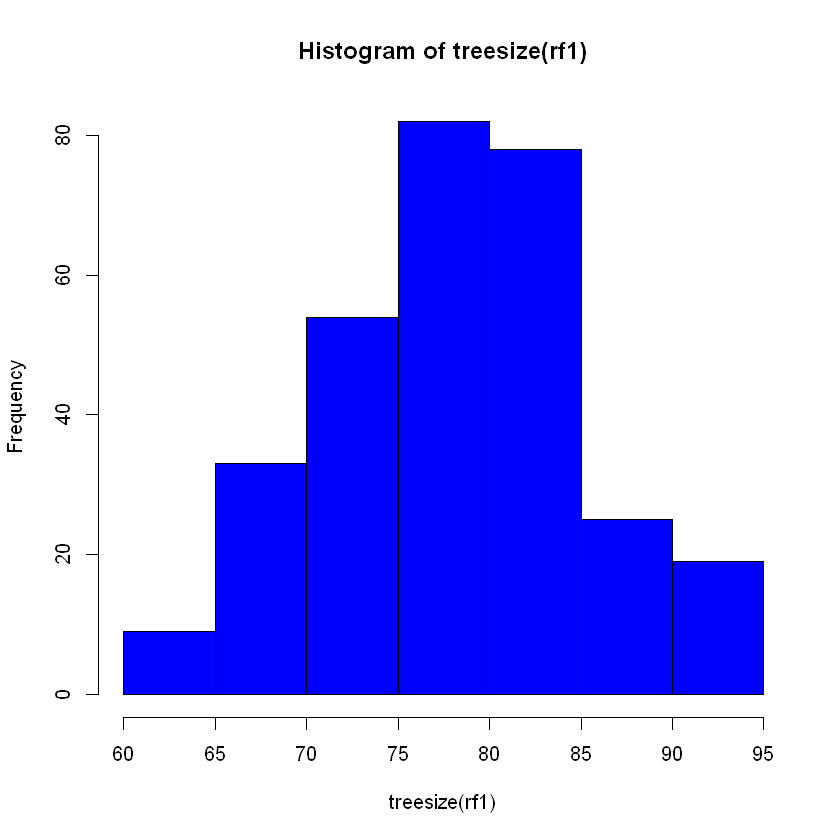

In [34]:
hist(treesize(rf1) , col = 'blue')

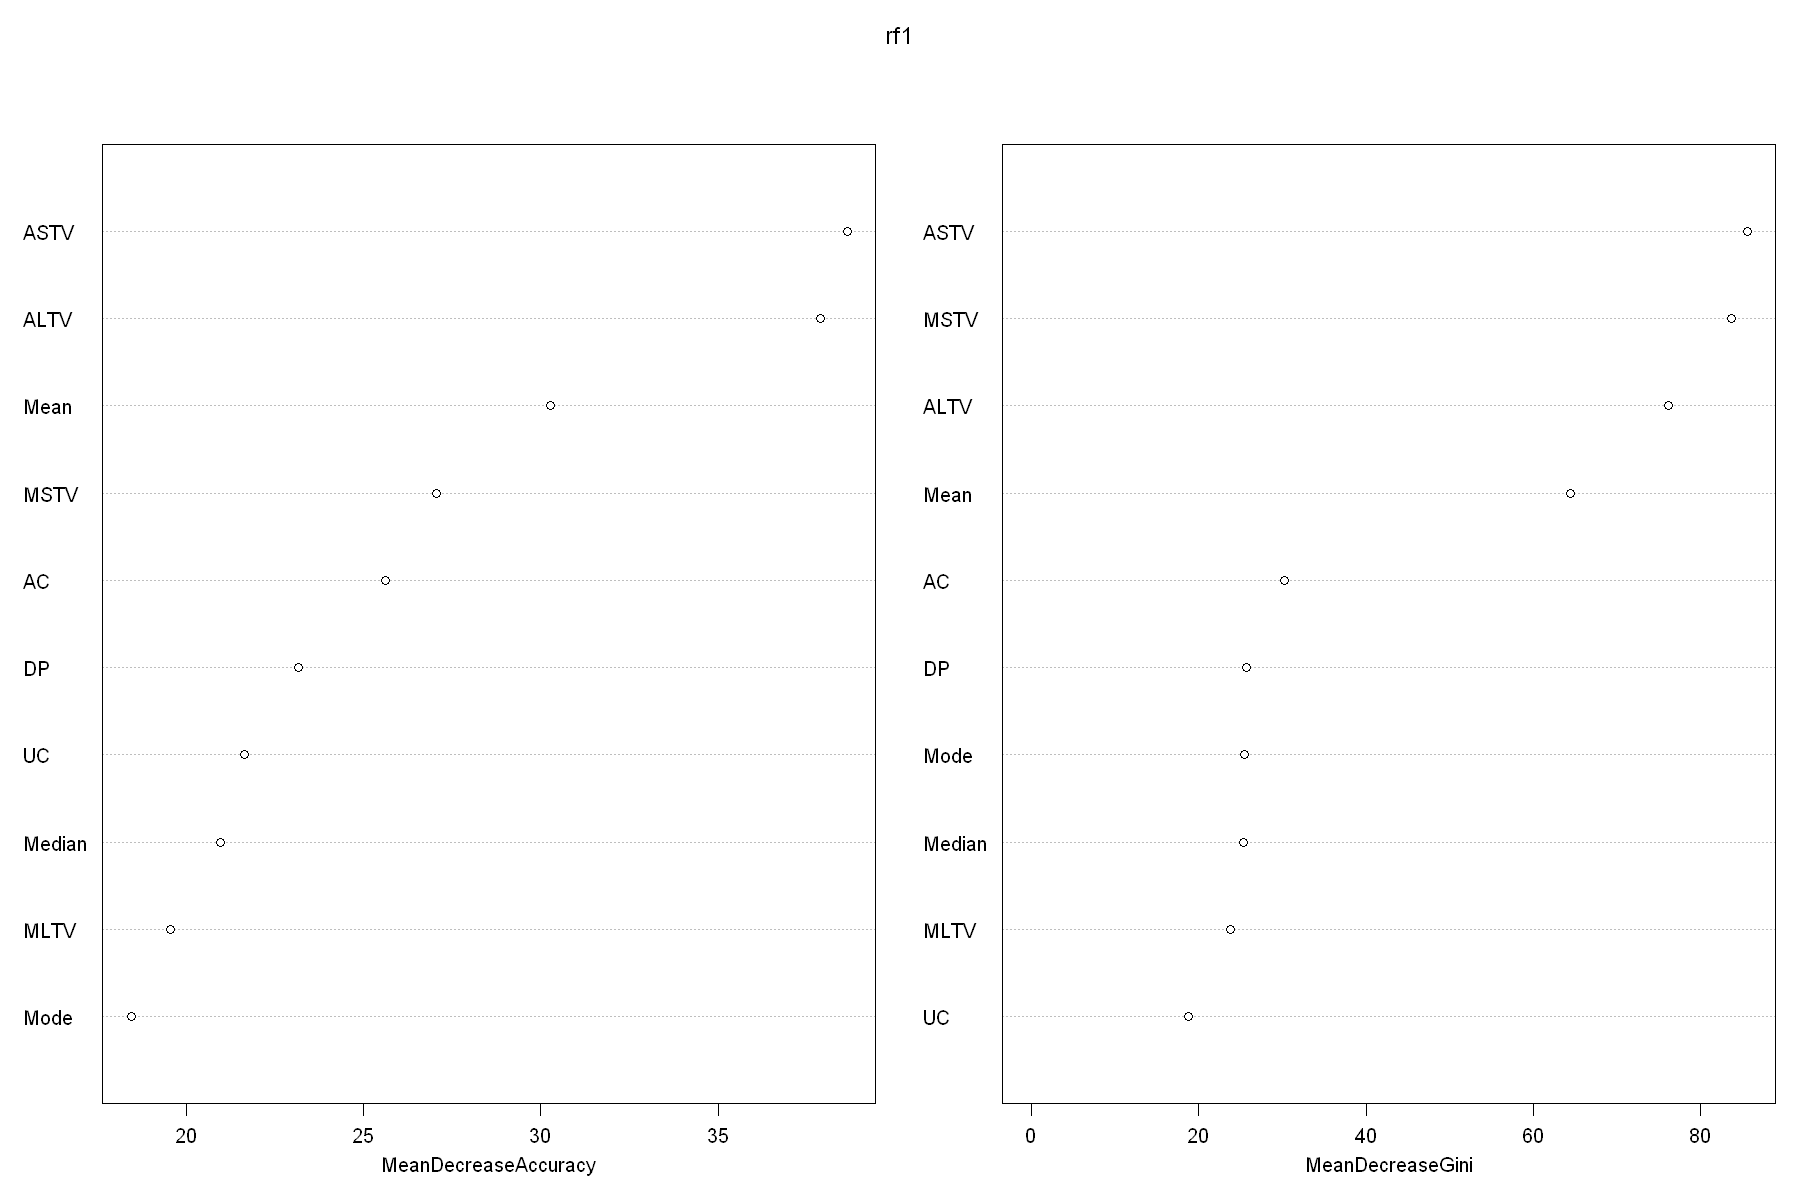

In [55]:
#Varaible Importance 
options(repr.plot.width = 15)
varImpPlot(rf1 , sort = T , n.var = 10)

In [40]:
varUsed(rf1)

[1] 1237 1034  917 1521  379    4  714 2123 1224 2227 1479 1308 1212 1263  955
[16]  338 1234 1591 1269  948  308

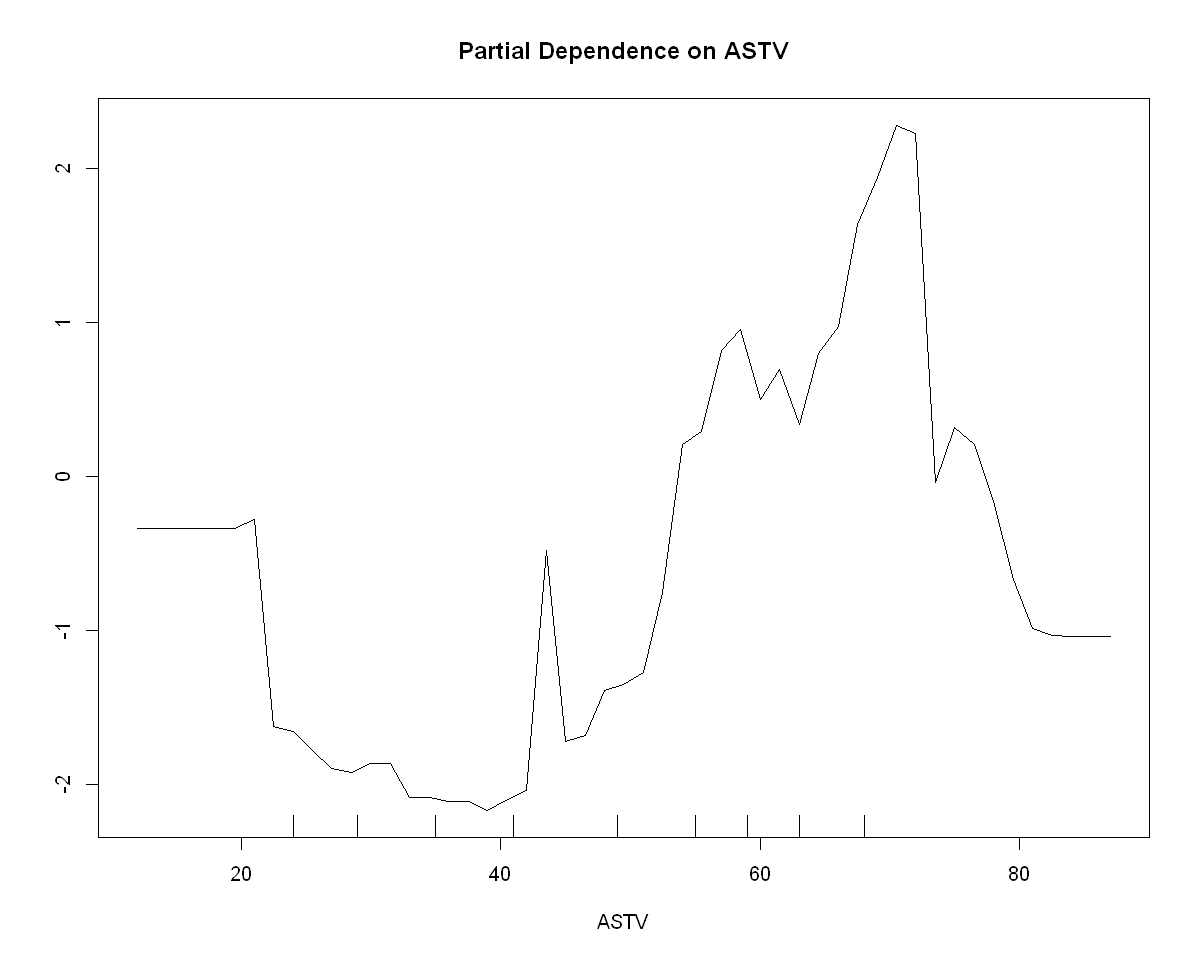

In [63]:
#Partial Dependence Plot
library(repr)
options(repr.plot.width = 10 , repr.plot.height = 8)
partialPlot(rf1 , tdata , ASTV , '2')

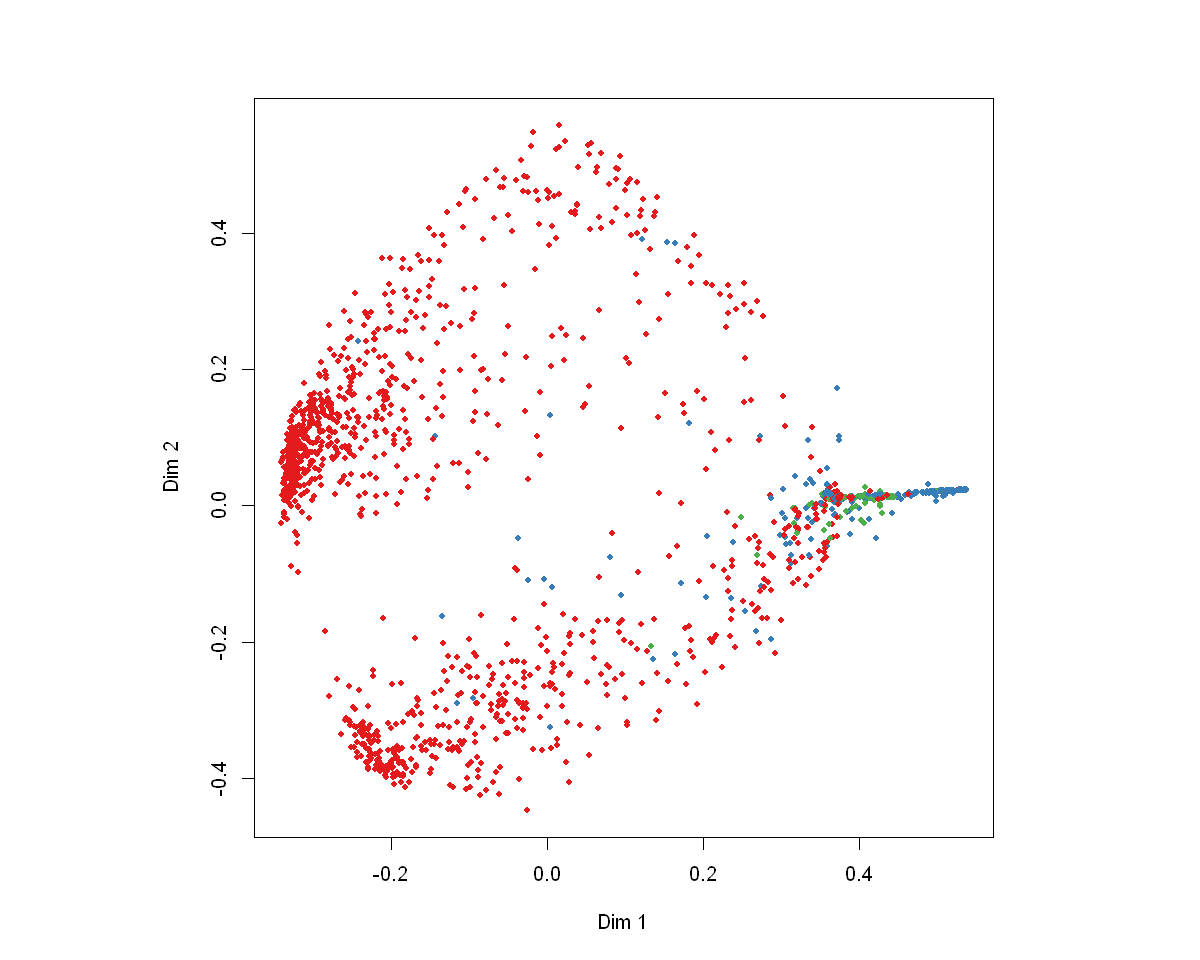

In [64]:
#Multi Dimension Proximity Plot

MDSplot(rf1 , tdata$NSP)